# Convolutional Neural-Networks

## Plan

1. Load in both MNIST and EMNIST. Validation set is MNIST (should be like 99%). Test set is EMNIST. - see generalisability.
2. Augment MNIST with transformations and see the difference in performance on EMNIST test set. 
3. Augment again with a preselected set of decent EMNIST data, and maybe gaussian noise. Grow model and try to keep generalisability score the same.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
x_train.shape

(60000, 28, 28)

CNN Model

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential

In [5]:
# Reshape the images to add a dimension for the channel
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)), # Input shape: this is the shape of one image, it has 1 dimension (greyscale)
    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Conv2D(32, (3, 3), activation='relu'), # This layer applies 32 differnt filters (each 3 x 3), each filter extracts different features (edges, corners, etc.)
                                           # ReLU activation is used to introduce non-linearity, allowing the model to learn more complex patterns. 

    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Flatten(),                             # This layer flattens the 2D feature maps into a 1D vector, which can be used as input to a fully connected neural network.

    Dense(256, activation='relu'),         # This layer has 256 neurons and uses ReLU activation.

    Dropout(0.5),                          # Regularisation technique where randomly selected neurons are ignored during training. This helps prevent overfitting.

    Dense(10, activation='softmax')        # This layer has 10 neurons and uses softmax activation. Softmax activation enables you to calculate probabilities for each class score.
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10


2024-02-18 14:19:32.865782: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


188/188 [==============================] - 4s 22ms/step - loss: 0.4241 - accuracy: 0.8681 - val_loss: 0.0916 - val_accuracy: 0.9722
Epoch 2/10
188/188 [==============================] - 4s 22ms/step - loss: 0.1044 - accuracy: 0.9687 - val_loss: 0.0586 - val_accuracy: 0.9833
Epoch 3/10
188/188 [==============================] - 4s 22ms/step - loss: 0.0753 - accuracy: 0.9768 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 4/10
188/188 [==============================] - 4s 22ms/step - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.0459 - val_accuracy: 0.9872
Epoch 5/10
188/188 [==============================] - 4s 22ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 6/10
188/188 [==============================] - 4s 21ms/step - loss: 0.0445 - accuracy: 0.9870 - val_loss: 0.0350 - val_accuracy: 0.9904
Epoch 7/10
188/188 [==============================] - 4s 22ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0342 - val_accuracy: 0.9906
Epoch 8/10

In [7]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_accuracy)

  1/313 [..............................] - ETA: 5s - loss: 0.0054 - accuracy: 1.0000

313/313 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9923
CNN Test Accuracy: 0.9922999739646912


### Convert Probabilities into Prediction Classes

In [8]:
import matplotlib.pyplot as plt
import numpy as np

313/313 [==============================] - 1s 2ms/step


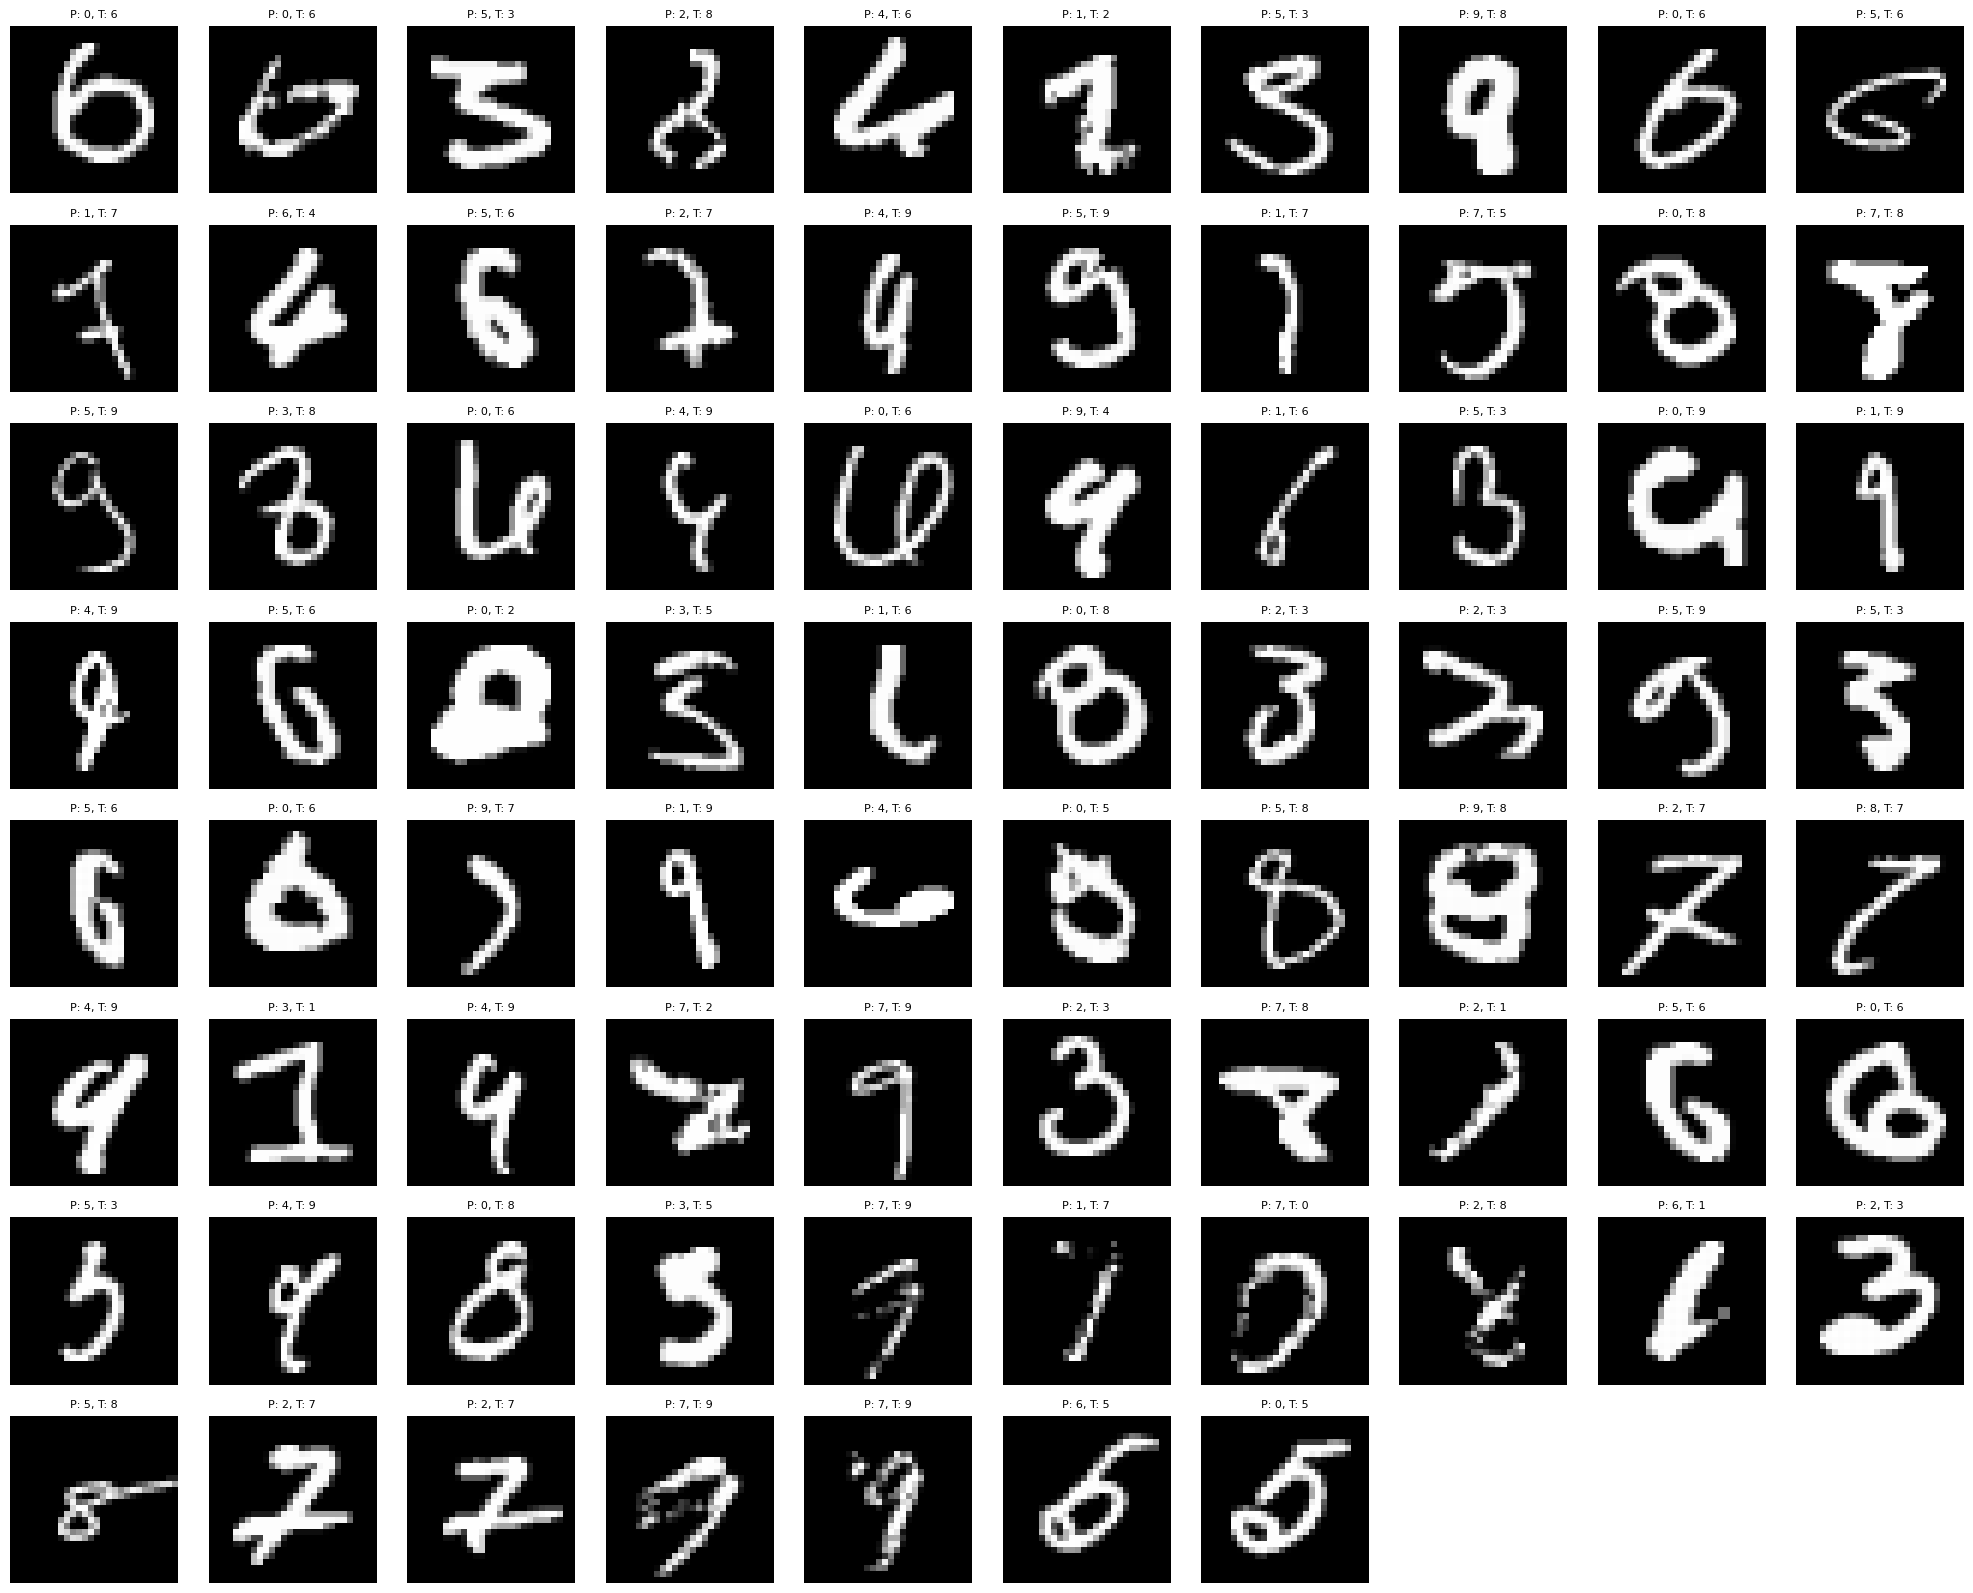

In [9]:
# Predict the labels for the test set
y_pred = cnn_model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify the indices of misclassified examples
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Function to visualize misclassified examples
def plot_misclassified(indexes, y_pred_classes, y_true, images, rows=10, cols=10):
    """Plots a selection of the misclassified images in grid format."""
    n = len(indexes)
    if n > rows*cols:
        print(f"Displaying first {rows*cols} out of {n} misclassified examples.")
        n = rows*cols
    
    plt.figure(figsize=(2*cols, 2*rows))
    for i in range(n):
        idx = indexes[i]
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"P: {y_pred_classes[idx]}, T: {y_true[idx]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first few misclassified examples
plot_misclassified(misclassified_indices, y_pred_classes, y_true, x_test)

In [10]:
net = cnn_model

#determine what type of network this is
conf=net.layers[0].get_config()
inshape=conf['batch_input_shape']
if inshape[1]==28:
    netType='CNN'
else:
    netType='MLP'

netType

'CNN'

In [11]:
#test with MNIST data
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_test = x_test.astype('float32')
x_test /= 255
if netType in ['MLP']:
    x_test = x_test.reshape(10000, 784)
else:
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST=', 100 * correct_classified / labels_test.size)

313/313 [==============================] - 1s 2ms/step
Percentage correctly classified MNIST= 99.23
